# Serie 25

# 1 Vrai ou faux

1. Faux, pas autour de la moyenne, mais autour de zero.
2. Vrai, $D_{x/y}$ passe par le point moyen $(\overline{x},\overline{y})$
3. Faux, elle peut se situer dans l'intervalle [Q2,Q3]
4. Faux, c'est l'inverse, le coefficient de corrélation linéaire sera nul si les deux variables sont indépendantes
5. Faux, le plus efficace est celui qui possède la plus petite variance. Une variance plus petite signifie une estimation plus proche de la vraie valeur du parameter estimé
6. Faux, $s^2$ est un estimateur biaisé de $\sigma^2$.
7. Vrai, un tirage non-exhaustif, donc vec remise, la distribution de la moyenne sera plus dispersé.
8. Faux, elle s'efforce à tirer des conclusions sur une population grâce à des échantillons de cette même population

# 2

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

In [351]:
df = pd.read_csv("HauteurSapin.txt", header=None, skiprows=1, sep=" ", decimal=",", names=["taille"])
df

,taille
0,142.24
1,154.94
2,132.08
3,157.48
4,160.02
...,...
95,119.38
96,124.46
97,175.26
98,167.64


In [355]:
mean = np.mean(df["taille"])
n = len(df["taille"])
df["var"] = sum((df["taille"] - mean)**2) / n
df["var corr"] = df["var"]*n/(n-1)

In [356]:
np.mean(df["var corr"]), np.var(df["taille"], ddof=1)

(636.4249246060606, 636.4249246060602)

In [357]:
n = len(df["taille"])
moyenne = sum(df["taille"]) / n
somme_carres_ecarts = sum((x - moyenne)**2 for x in df["taille"])
variance_non_biaisee = somme_carres_ecarts / (n-1)
variance_non_biaisee

636.4249246060606

# 3

In [358]:
benchmark = pd.read_csv("crunchOne.benchmark.figures.txt", header=None, sep=" ", decimal=".", names=["temps"])
n_time = len(benchmark["temps"])
benchmark

,temps
0,203.468
1,202.495
2,202.545
3,203.507
4,202.501
...,...
95,202.451
96,201.442
97,202.611
98,202.649


In [359]:
mean_time = np.mean(benchmark["temps"])
mean_time

202.63140000000004

In [360]:
std_time = np.std(benchmark["temps"])
std_time

1.460968493842356

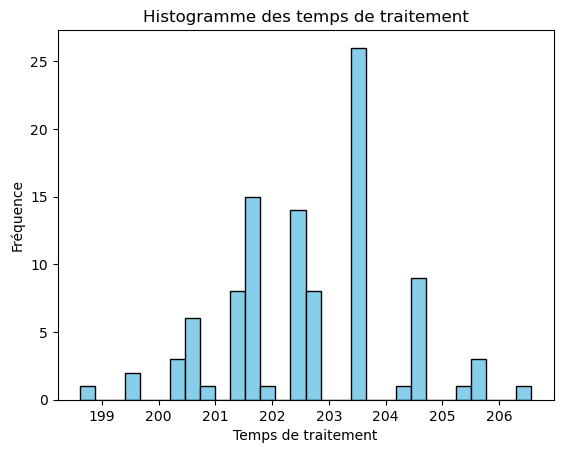

In [361]:
import matplotlib.pyplot as plt

plt.hist(benchmark["temps"], bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Temps de traitement")
plt.ylabel("Fréquence")
plt.title("Histogramme des temps de traitement")
plt.show()

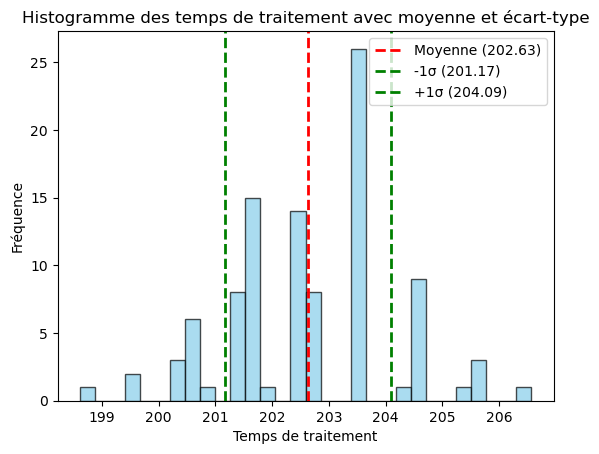

In [362]:
plt.hist(benchmark["temps"], bins=30, color="skyblue", edgecolor="black", alpha=0.7)

plt.axvline(mean_time, color="red", linestyle="dashed", linewidth=2, label=f"Moyenne ({mean_time:.2f})")

plt.axvline(mean_time - std_time, color="green", linestyle="dashed", linewidth=2,
            label=f"-1σ ({mean_time - std_time:.2f})")
plt.axvline(mean_time + std_time, color="green", linestyle="dashed", linewidth=2,
            label=f"+1σ ({mean_time + std_time:.2f})")

plt.xlabel("Temps de traitement")
plt.ylabel("Fréquence")
plt.title("Histogramme des temps de traitement avec moyenne et écart-type")
plt.legend()
plt.show()

In [363]:
def distr_poids(x):
    return norm.pdf((x['temps']-mean_time)/std_time)/std_time

In [364]:
# Est-ce que 68% des valeurs se trouvent dans l'intervalle sigma 1 ?

borne_inferieure = moyenne - std_time
borne_superieure = moyenne + std_time

proportion_theorique = norm.cdf(borne_superieure, loc=moyenne, scale=std_time) - \
                       norm.cdf(borne_inferieure, loc=moyenne, scale=std_time)

print(f"Proportion théorique entre [μ-σ, μ+σ] (suivant une loi normale) : {proportion_theorique * 100:.2f}%")

Proportion théorique entre [μ-σ, μ+σ] (suivant une loi normale) : 68.27%


d. Oui, la gaussienne est valable due à la bonne répartition des ~ 68% dans l'intervalle sigma 1.

# 4

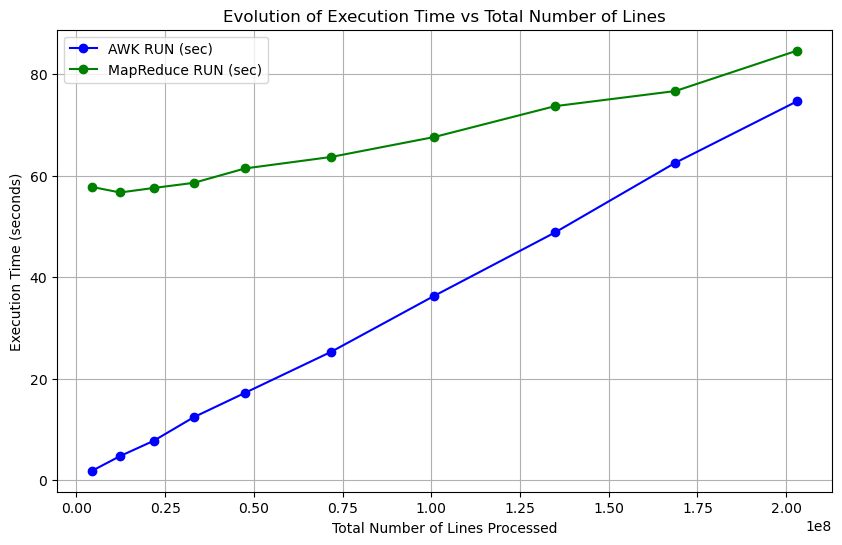

In [365]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("MapReduceBenchmark.csv", sep=';')

cumulated_records = data["Cumulated N Records"]
awk_run_time = data["AWK RUN (sec)"]
mapreduce_run_time = data["MAPR RUN (sec)"]

plt.figure(figsize=(10, 6))
plt.plot(cumulated_records, awk_run_time, marker='o', label="AWK RUN (sec)", color="blue")
plt.plot(cumulated_records, mapreduce_run_time, marker='o', label="MapReduce RUN (sec)", color="green")

plt.xlabel("Total Number of Lines Processed")
plt.ylabel("Execution Time (seconds)")
plt.title("Evolution of Execution Time vs Total Number of Lines")
plt.legend()
plt.grid(True)
plt.show()

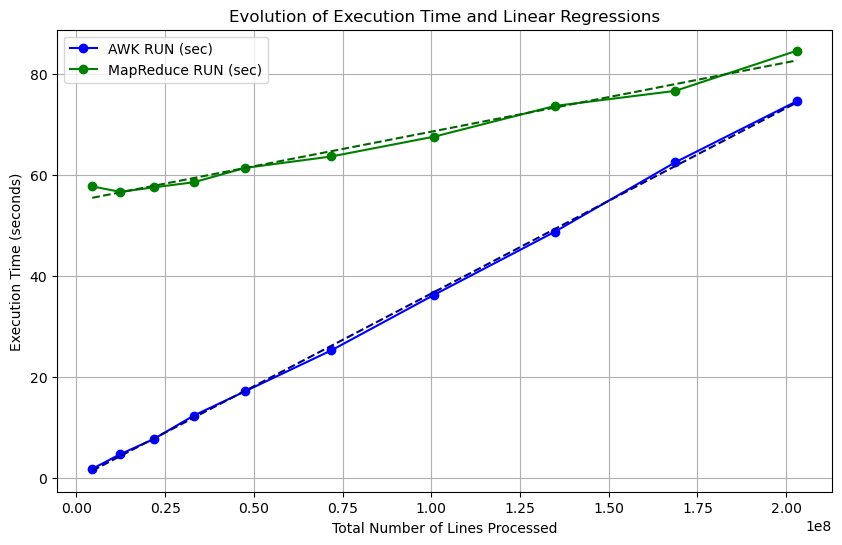

In [366]:
import matplotlib.pyplot as plt

n = len(cumulated_records)

data[['AWK RUN (sec)', 'Cumulated N Records']].cov()
a_awk = data.cov()['AWK RUN (sec)']['Cumulated N Records'] / data.cov()['Cumulated N Records']['Cumulated N Records']
b_awk = data['AWK RUN (sec)'].mean() - a_awk * data['Cumulated N Records'].mean()

data['awk_line'] = a_awk * data['Cumulated N Records'] + b_awk

data[['MAPR RUN (sec)', 'Cumulated N Records']].cov()
a_maprd = data.cov()['MAPR RUN (sec)']['Cumulated N Records'] / data.cov()['Cumulated N Records']['Cumulated N Records']
b_maprd = data['MAPR RUN (sec)'].mean() - a_maprd * data['Cumulated N Records'].mean()

data['mprd_line'] = a_maprd * data['Cumulated N Records'] + b_maprd

# Tracé des courbes et régressions
plt.figure(figsize=(10, 6))
plt.plot(cumulated_records, awk_run_time, marker='o', label="AWK RUN (sec)", color="blue")
plt.plot(cumulated_records, mapreduce_run_time, marker='o', label="MapReduce RUN (sec)", color="green")
plt.plot(cumulated_records, data['awk_line'], linestyle="--", color="darkblue",)
plt.plot(cumulated_records, data['mprd_line'], linestyle="--", color="darkgreen")

plt.xlabel("Total Number of Lines Processed")
plt.ylabel("Execution Time (seconds)")
plt.title("Evolution of Execution Time and Linear Regressions")
plt.legend()
plt.grid(True)
plt.show()

Recherche de l'abscisse ou les droites se croisent

In [367]:
X = (b_maprd - b_awk) / (a_awk - a_maprd)
print(f"A partir de {X:.2f} lignes, MapReduce commence à être plus performant.")

A partir de 239232480.97 lignes, MapReduce commence à etre plus performant.
